# Exploratory Data Analysis

Note: This notebook contains some interactive graphs created by Plotly which cannot be correctly shown in `ipynb`. Please view `html` file for interactive plots.

The link of our published website: https://sp1470.github.io/project_eda/index.html

<img src="https://shidepu.georgetown.domains/ANLY502_project/Pokemon-big-poster-01.jpg" width="750" height="750" class="center"/>

(Source: [Capsule Computers](https://www.capsulecomputers.com.au/2013/09/pokemon-gotta-catch-em-all-remix-is-catchy/))

1.	What is the most popular subreddit related to Pokémon from January 2021?

  Business goal: Determine popular subreddits related to Pokémon. Help company to understand what the most popular field about Pokémon is in social media.

  Technical proposal: Choose keywords to filter Pokémon related subreddits. Use regex to filter all subreddits related to Pokémon using keywords on submissions data. Remove subreddits which contain too much useless information. Count number of submissions in each subreddit and rank them in descending order. Present top 20 subreddits with a graph to show subreddits with top popularity. Repeat the same filtering process on comments data. Save both filtered data into parquets and use them for future analysis.


2.	What Pokémon events are successful marketing campaigns that can attract discussion and attention from players and interested parties?

  Business goal: Determine the trend of change of numbers of submissions in top 3 Pokémon subreddits.

  Technical proposal: Select submissions and comments in the top 3 subreddits. Transfer UNIX timestamps to human readable time format specifically yyyy-mm-dd. Conduct counts of number of posts over time in different subreddits for submission data and comment data separately. Aggregate two count results by time to create time series data. Save the created time series data to csv for future time series analysis. Present result with time series graphs. 


3.	Does the most active author in reddit have commercial value?

  Business goal: Determine influential users in top 3 popular Pokémon subreddits.

  Technical proposal: Select top 3 popular subreddit from the data saved in Question 1. Perform summation of number of comments by authors in Submission data. Sort the aggregation table in descending order and present the top 10 influential authors with a graph. Conduct summation of number of comments by subreddit for top 5 popular authors. Filter top 10 submissions which receive largest number of comments for each author.

4.	How are the popularities of the recent 4 Pokémon games change from January 2021 to August 2022?

  Business goal: Determine popularities of recent 4 Pokémon games including Pokémon: Sword & Shield (2019-11-15), Pokémon Brilliant Diamond & Shining Pearl (2021-11-19), Pokémon Legends: Arceus (2022-1-28) and Pokémon Scarlet & Violet (2022-11-18).

  Technical proposal: Perform research about these 4 games and decide keywords for these games. Use regex to filter submissions comments related to these games by keywords. Create three dummy variables for each game to indicate if a submission or comment mentions each game. Sum 4 dummy variables over day to create time series data. Plot time series graphs for 4 dummy variables to show the trend of popularities.

5.	What is the most popular Pokémon discussed in subreddits?

  Business goal: Determine the Pokémon that receives the greatest number of discussions.

  Technical proposal: At the end of August 2022, there are 905 different Pokémons in Pokémon database. We regard Pokémons at the same evolution chain and different evolutions with the same origin as one Pokémon. Create a list of 15 Pokémon names which are potential candidates of the most popular Pokémon. Create dummy variables for each selected Pokémon using regex. Also, create dummy variables for all categories of Legendary Pokémon. Perform summation over dummy variables and sort result in descending order. Present result in a summary table.

6.	Eevee is one of the most special Pokémon which has the greatest number of different evolutions. What is the most popular Eevee evolution in different subreddits?

  Business goal: Determine the Eevee evolution that receives the greatest number of discussions in different Pokémon subreddits.

  Technical proposal: Use Eevee dummy variable created in Question 5 to filter all submissions and comments mentioned Eevee. Create dummy variables for each Eevee evolution (8 different evolutions). Conduct counts of number of occurrences of each dummy variable in different subreddits. Present the result with a summary table. 

7.	What is the overall attitude for Pokémon in related subreddit?

  Business goal: Perform sentiment analysis on Pokémon subreddits posts. Determine the overall attributes in each subreddits.

  Technical proposal: Use NLP to clean submission and comment texts. Split texts into sentences and convert all words into lowercase. Remove html links, punctuations, stop words, and special characters (emoji) from sentences. Use a pretrained sentiment analysis model and build Spark NLP pipeline. Use the pipeline to perform sentiment analysis on submission and comment bodies. Count number of sentiments in subreddits and present the result as a table. 

8.	The newest Pokémon anime, Pokémon Journeys: The Series, received a lot of bad reviews over the past year. How does people’s attitude for this anime changes in Pokémon subreddits?

  Business goal: Determine the trend of changes of sentiments in all Pokémon subreddits. Determine the top 3 subreddits with the highest proportion of negative sentiment.

  Technical proposal: Create a list of keywords to search Pokémon Journeys: The Series. Filter submissions and comments which mention the anime using regex. Count number of sentiments over time and present the result with a time series plot. Count number of sentiments in different subreddits and compute proportions of sentiments in each subreddit. Select top 3 subreddits with the highest proportion of negative sentiment and present result in a table.

9.	Can we use number of posts in Pokémon subreddits to predict the stock price of Nintendo?

  Business goal: Perform time series analysis and build a time series model to predict Nintendo stock price using number of posts in Pokémon subreddits.

  Technical proposal: Gather Nintendo stock data from January 2021 to August 2022 from Yahoo Finance. Full outer Join the stock data with the time series data created in Question 2. Fill missing values in joint data with linear interpolation. Train a VAR (vector autoregression) model to predict stock price. Present result by a graph showing actual vs. predicted data.

10.	Can we classify submissions to their subreddit based on submission contents?

   Business goal: Build classification models to predict the subreddits of the submissions based on the submission contents.  

   Technical proposal: Use submissions from selected subreddits related to Pokémon. Perform tokenization, remove stop words, remove any external links, punctuations, and special characters, and transform the submission contents into a document term matrix. Use StringIndexer to encode the label column to label indices. Split the data into training and test sets. Build Spark ML pipeline. Use models such as Naive Bayes and random forest to perform text classification. Evaluate model performances with accuracies, confusion matrices, and ROC curves.

##Import & Explore Data

In [0]:
# check origin file 
dbutils.fs.ls("abfss://anly502@marckvaismanblob.dfs.core.windows.net/reddit/parquet")

Out[1]: [FileInfo(path='abfss://anly502@marckvaismanblob.dfs.core.windows.net/reddit/parquet/comments/', name='comments/', size=0, modificationTime=1666557328000),
 FileInfo(path='abfss://anly502@marckvaismanblob.dfs.core.windows.net/reddit/parquet/submissions/', name='submissions/', size=0, modificationTime=1666559745000)]

In [0]:
# read submissions and comments data from origin files
comments = spark.read.parquet("abfss://anly502@marckvaismanblob.dfs.core.windows.net/reddit/parquet/comments")
submissions = spark.read.parquet("abfss://anly502@marckvaismanblob.dfs.core.windows.net/reddit/parquet/submissions")

In [0]:
# show first 10 rows of submissions
submissions.show(10)

+------------------+------------------+--------+-----------------+--------------+----------------------+--------------------+---------+----------+------------+-----------+----------------+---------------------+----------------+-------------+--------------------+---------------+------+----------+---------+------+------+----------+--------+------+---------+----------------+----------------------+-------+--------+--------------------+--------------------+------+--------------------+--------------------+-------------+------------+--------------+-------------+-------+-----------------------+--------------------+------+------------+--------------------+--------+-----------+---------------------+------------+------------+-----+--------------------+--------------------+--------------------+-------+--------+--------------+------------+--------------+--------------------+--------------------+----------------------+--------------------+----------------+---------------+--------------------+-------

In [0]:
# schema of submissions
submissions.printSchema()

root
 |-- adserver_click_url: string (nullable = true)
 |-- adserver_imp_pixel: string (nullable = true)
 |-- archived: boolean (nullable = true)
 |-- author: string (nullable = true)
 |-- author_cakeday: boolean (nullable = true)
 |-- author_flair_css_class: string (nullable = true)
 |-- author_flair_text: string (nullable = true)
 |-- author_id: string (nullable = true)
 |-- brand_safe: boolean (nullable = true)
 |-- contest_mode: boolean (nullable = true)
 |-- created_utc: long (nullable = true)
 |-- crosspost_parent: string (nullable = true)
 |-- crosspost_parent_list: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- approved_at_utc: string (nullable = true)
 |    |    |-- approved_by: string (nullable = true)
 |    |    |-- archived: boolean (nullable = true)
 |    |    |-- author: string (nullable = true)
 |    |    |-- author_flair_css_class: string (nullable = true)
 |    |    |-- author_flair_text: string (nullable = true)
 |    |    |-- b

In [0]:
# show first 10 rows of comments
comments.show(10)

+------------------+--------------+----------------------+--------------------+--------------------+--------+----------------+-----------+-------------+------+------+-------+------------+---------+----------+--------------------+------------+-----+--------+--------------------+------------+
|            author|author_cakeday|author_flair_css_class|   author_flair_text|                body|can_gild|controversiality|created_utc|distinguished|edited|gilded|     id|is_submitter|  link_id| parent_id|           permalink|retrieved_on|score|stickied|           subreddit|subreddit_id|
+------------------+--------------+----------------------+--------------------+--------------------+--------+----------------+-----------+-------------+------+------+-------+------------+---------+----------+--------------------+------------+-----+--------+--------------------+------------+
|        FieldOfFox|          null|                  null|                null|  Music taste is bad|    true|               

In [0]:
# schema of comments
comments.printSchema()

root
 |-- author: string (nullable = true)
 |-- author_cakeday: boolean (nullable = true)
 |-- author_flair_css_class: string (nullable = true)
 |-- author_flair_text: string (nullable = true)
 |-- body: string (nullable = true)
 |-- can_gild: boolean (nullable = true)
 |-- controversiality: long (nullable = true)
 |-- created_utc: long (nullable = true)
 |-- distinguished: string (nullable = true)
 |-- edited: string (nullable = true)
 |-- gilded: long (nullable = true)
 |-- id: string (nullable = true)
 |-- is_submitter: boolean (nullable = true)
 |-- link_id: string (nullable = true)
 |-- parent_id: string (nullable = true)
 |-- permalink: string (nullable = true)
 |-- retrieved_on: long (nullable = true)
 |-- score: long (nullable = true)
 |-- stickied: boolean (nullable = true)
 |-- subreddit: string (nullable = true)
 |-- subreddit_id: string (nullable = true)



In [0]:
# import packages
import pyspark.sql.functions as f
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import plotly.express as px

## 1.	What is the most popular subreddit related to Pokémon from January 2021?

  Business goal: Determine popular subreddits related to Pokémon. Help company to understand what the most popular field about Pokémon is in social media.

  Technical proposal: Choose keywords to filter Pokémon related subreddits. Use regex to filter all subreddits related to Pokémon using keywords on submissions data. Remove subreddits which contain too much useless information. Count number of submissions in each subreddit and rank them in descending order. Present top 20 subreddits with a graph to show subreddits with top popularity. Repeat the same filtering process on comments data. Save both filtered data into parquets and use them for future analysis.

Choose keywords to filter Pokémon related subreddits. Most of Pokémon subreddits contain **pokemon** and **pkmn** in their names. In Pokémon world, Silph Co. is the leading company in Pokémon technology which develops most of Pokémon balls and Pokémon items. Thus, subreddits containing **silph** are also related to Pokémon. The keyword to filter should be **pokemon**, **pkmn** and **silph**.

Use regex to filter all subreddits related to Pokémon using keywords on submissions data.

In [0]:
submission_pokemon = submissions.filter(f.col('subreddit').rlike("(?i)pokemon|(?i)pkmn|(?i)silph"))

In [0]:
# show submissions after filtering
submission_pokemon.show(10)

+------------------+------------------+--------+-------------+--------------+----------------------+--------------------+---------+----------+------------+-----------+----------------+---------------------+----------------+-------------+--------------------+---------------+------+----------+---------+------+------+----------+--------+------+---------+----------------+----------------------+-------+--------+--------------------+--------------------+------+-----+--------------------+-------------+------------+--------------+-------------+-------+-----------------------+--------------------+------+---------+-------+--------+-----------+---------------------+------------+------------+-----+------------+--------------------+--------------------+-------+--------+----------------+------------+--------------+--------------------+--------------------+----------------------+---------+----------------+---------------+--------------------+--------------------+----------------+
|adserver_click_url|

The first two subreddits, PokemonGoFriends and PokemonGoRaids, have significantly higher number of submissions than other Pokémon related subreddits. After checking these subreddits, PokemonGoFriends is for players to exchange game friend code and PokemonGoRaids is for recruiting raids. Thus, most of submissions in both subreddits are useless to analysis. We will remove both subreddits from the data.

In [0]:
# count number of submissions in each subreddit
submission_pokemon.groupBy("subreddit") \
                  .agg(f.count(f.col("subreddit")).alias("submission_count")) \
                  .sort(f.col("submission_count").desc()) \
                  .show()

+--------------------+----------------+
|           subreddit|submission_count|
+--------------------+----------------+
|    PokemonGoFriends|         1136135|
|      PokemonGoRaids|         1070573|
|           pokemongo|          278548|
|             pokemon|          267509|
|       pokemontrades|          192038|
|          PokemonTCG|          188596|
|PokemonSwordAndSh...|          124246|
|        ShinyPokemon|           96804|
|        PokemonUnite|           91348|
|         PokemonHome|           69727|
|        TheSilphRoad|           55636|
|       pokemongobrag|           51488|
|      PokemonMasters|           39217|
|       pkmntcgtrades|           38778|
|PokemonLegendsArceus|           38222|
| CasualPokemonTrades|           36796|
|         PokemonBDSP|           33507|
|          Pokemonart|           24946|
|   PokemonGoSpoofing|           22353|
|     PokemonROMhacks|           20755|
+--------------------+----------------+
only showing top 20 rows



In [0]:
# Remove PokemonGoFriends and PokemonGoRaids from data.
submission_pokemon_filtered = submission_pokemon.filter(f.col("subreddit") != "PokemonGoFriends")
submission_pokemon_filtered = submission_pokemon_filtered.filter(f.col("subreddit") != "PokemonGoRaids")

In [0]:
submission_pokemon_filtered.show()

+------------------+------------------+--------+--------------------+--------------+----------------------+--------------------+---------+----------+------------+-----------+----------------+---------------------+----------------+-------------+--------------------+---------------+-------------+----------+---------+------+------+----------+--------+------+---------+----------------+----------------------+-------+--------+--------------------+------------------+------+--------------------+--------------------+-------------+------------+--------------+-------------+-------+-----------------------+--------------------+------+---------+--------------------+--------+-----------+---------------------+------------+------------+-----+--------------------+--------------------+--------------------+-------+--------+-------------------+------------+--------------+--------------------+--------------------+----------------------+--------------------+----------------+---------------+------------------

In [0]:
# shape of the submissions data
row_count = submission_pokemon_filtered.count()
col_count = len(submission_pokemon_filtered.columns)

In [0]:
print(f"Shape of the Pokémon subreddits in submissions data is {row_count} x {col_count}") 

Shape of the Pokémon subreddits in submissions data is 2113463 x 68


In [0]:
# show all Pokemon subreddits in the filtered data
from collections import OrderedDict
pokemon_subreddits = submission_pokemon_filtered.rdd.map(lambda x : x.subreddit).collect()
pokemon_subreddits = list(OrderedDict.fromkeys(pokemon_subreddits))
print(pokemon_subreddits)

['PokemonRMXP', 'pokemon', 'PokemonQuest', 'pokemongo', 'CasualPokemonTrades', 'pkmntcgtrades', 'pokemongobrag', 'pokemonmemes', 'PokemonHome', 'TheSilphRoad', 'PokemonGoSale', 'Pokemongiveaway', 'TheSilphArena', 'PokemonMasters', 'PokemonSwordAndShield', 'PokemonTCG', 'pokemoncardcollectors', 'PokemonClover', 'PokemonTradesSwSh', 'pokemonshowdown', 'pkmntcgcollections', 'PokemonXenoverseGuide', 'pokemonanime', 'PokemonAntiScalp', 'PokemonGoHouston', 'PokemonGoTrade', 'ShinyPokemon', 'PokemonMusic', 'pokemongoLondon', 'PokemonGoMystic', 'pokemontrades', 'PokemonFusion', 'pokemonplatinum', 'pkmntcg', 'pokemoncards', 'UTPokemonGo', 'Pokemon_art_and_memes', 'Pokemonart', 'PokemonGoSpoofing', 'PKMNTCGDeals', 'PokemonTabletop', 'PokemonGoVancouver', 'PokemonFriendExchange', 'twitchplayspokemon', 'PokemonRaids', 'Serena_Pokemon', 'PokemonUnbound', 'PokemonMisprints', 'PokemonCafeMix', 'PokemonGoRaidInvites', 'PokemonHallOfFame', 'Pokemonexchange', 'Pokemoncardappraisal', 'PokemonHentai_', 'P

In [0]:
# count number of Pokémon subreddits
num_subreddit = len(pokemon_subreddits)
print(f"There are {num_subreddit} Pokémon subreddits in the submissions data.")

There are 4305 Pokémon subreddits in the submissions data.


In [0]:
# select top 20 Pokémon subreddits
top_pokemon_subreddit = submission_pokemon_filtered.groupBy("subreddit") \
                                          .agg(f.count(f.col("subreddit")).alias("submission_count")) \
                                          .sort(f.col("submission_count").desc()) \
                                          .limit(20).toPandas()

In [0]:
top_pokemon_subreddit

,subreddit,submission_count
0,pokemongo,278548
1,pokemon,267509
2,pokemontrades,192038
3,PokemonTCG,188596
4,PokemonSwordAndShield,124246
5,ShinyPokemon,96804
6,PokemonUnite,91348
7,PokemonHome,69727
8,TheSilphRoad,55636
9,pokemongobrag,51488


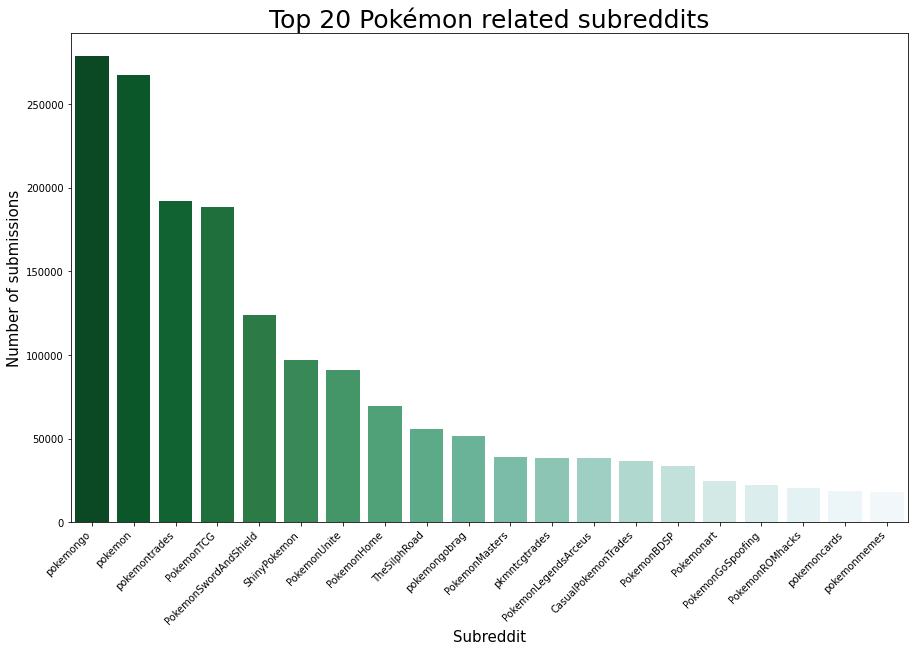

In [0]:
# Figure.1
# plot top 20 Pokémon related subreddits
plt.figure(figsize=(15,9))
plot_1 = sns.barplot(x="subreddit", y="submission_count", data=top_pokemon_subreddit, palette=sns.color_palette("BuGn_r", n_colors = 20))
plot_1.set_title("Top 20 Pokémon related subreddits", fontsize=25)
plot_1.set_xlabel("Subreddit", fontsize=15)
plot_1.set_ylabel("Number of submissions", fontsize=15)
plot_1.set_xticklabels(plot_1.get_xticklabels(), rotation = 45, horizontalalignment='right')

plot_fpath = os.path.join("data/plots", "top20_pokemon_subreddits.png")

plt.savefig(plot_fpath)
plt.show()

Result: 
The graph shows that pokemongo has the highest number of submissions. Indicating that it is the most popular subreddit among all subreddits related to Pokémon. Subreddit pokemon is the second most popular subreddit among all Pokémon-related subreddits.

Conclusion:
The result suggests that Pokémon Go remains incredibly popular. The product is probably the most successful product derived from the IP of all time. In a business sense, a deeper dive into its logic is critical and lessons can be learned from the unprecedented success. Pokémon Go introduces customizable options, brings in social connections to the experience, and provides simple UI backed by advanced technology such as AR. That makes it accessible to a larger audience than traditional mobile games. In conclusion, the unique features of Pokemon Go largely influence its performance. 

Further step:
Thus, for the next step, one possible direction is to research how different product features impact the success of games related to Pokémon. There might be a binary variable indicating the success/failure of a game product. Machine learning models such as logistic regression or random forest can be used to conduct the classification analysis.

In [0]:
# select Pokémon subreddits in comments data
comments_pokemon = comments.filter(f.col("subreddit").isin(pokemon_subreddits))

In [0]:
comments_pokemon.show(10)

+-----------------+--------------+----------------------+--------------------+--------------------+--------+----------------+-----------+-------------+------+------+-------+------------+---------+----------+--------------------+------------+-----+--------+--------------------+------------+
|           author|author_cakeday|author_flair_css_class|   author_flair_text|                body|can_gild|controversiality|created_utc|distinguished|edited|gilded|     id|is_submitter|  link_id| parent_id|           permalink|retrieved_on|score|stickied|           subreddit|subreddit_id|
+-----------------+--------------+----------------------+--------------------+--------------------+--------+----------------+-----------+-------------+------+------+-------+------------+---------+----------+--------------------+------------+-----+--------+--------------------+------------+
|        [deleted]|          null|                  null|                null|           [removed]|    true|               0| 1

In [0]:
# shape of the comments data
comment_row_count = comments_pokemon.count()
comment_col_count = len(comments_pokemon.columns)
print(f"Shape of the Pokémon subreddits in comments data is {comment_row_count} x {comment_col_count}") 

Shape of the Pokémon subreddits in comments data is 20644322 x 21


In [0]:
# select top 20 Pokémon subreddits in comments
top_pokemon_comments = comments_pokemon.groupBy("subreddit") \
                                       .agg(f.count(f.col("subreddit")).alias("submission_count")) \
                                       .sort(f.col("submission_count").desc()) \
                                       .limit(20).toPandas()

In [0]:
top_pokemon_comments

,subreddit,submission_count
0,pokemon,4166494
1,pokemontrades,2029282
2,pokemongo,1744124
3,PokemonTCG,1619654
4,PokemonSwordAndShield,1496879
5,TheSilphRoad,1284885
6,PokemonHome,1172118
7,PokemonUnite,1171021
8,pkmntcgtrades,1126560
9,PokemonMasters,543369


In [0]:
# save filtered submissions to parquet
submission_pokemon_filtered.write.parquet("/FileStore/pokemon_submissions")

In [0]:
# save filtered comments to parquet
comments_pokemon.write.parquet("/FileStore/pokemon_comments")

In [0]:
# check if saving is successful
dbutils.fs.ls("/FileStore")

Out[48]: [FileInfo(path='dbfs:/FileStore/pokemon_comments/', name='pokemon_comments/', size=0, modificationTime=1667762096000),
 FileInfo(path='dbfs:/FileStore/pokemon_submissions/', name='pokemon_submissions/', size=0, modificationTime=1667761511000),
 FileInfo(path='dbfs:/FileStore/tables/', name='tables/', size=0, modificationTime=1666743820000)]

## Data Quality Check

In [0]:
# read saved data 
pokemon_submissions = spark.read.parquet("/FileStore/pokemon_submissions")
pokemon_comments = spark.read.parquet("/FileStore/pokemon_comments")

As shown in Question 1, after filtering, the shape of the Pokémon submissions data is 2113463 x 68. There are 4305 Pokémon subreddits in the submissions data. The important columns for our analysis are **author**, **created_utc**, **subreddit**, **selftext**, **title** and **num_comments**. We check if these columns contain missing values. As shown in the table below, none of these columns contain missing values.

In [0]:
# check missing values for submissions data
submission_col = ["author", "created_utc", "subreddit", "selftext", "title", "num_comments"]
pokemon_submissions.select([f.count(f.when(f.isnan(col) | f.col(col).isNull(), col)).alias(col) for col in submission_col]).show()

+------+-----------+---------+--------+-----+------------+
|author|created_utc|subreddit|selftext|title|num_comments|
+------+-----------+---------+--------+-----+------------+
|     0|          0|        0|       0|    0|           0|
+------+-----------+---------+--------+-----+------------+



As shown in Question 1, the shape of the Pokémon comments data is 20644322 x 21. We are interested in **author**, **created_utc**, **subreddit**, **body** and **score**. The table below shows that body column contains 1 missing value.

In [0]:
# check missing values for comments data
comment_col = ["author", "created_utc", "subreddit", "body", "score"]
pokemon_comments.select([f.count(f.when(f.isnan(col) | f.col(col).isNull(), col)).alias(col) for col in comment_col]).show()

+------+-----------+---------+----+-----+
|author|created_utc|subreddit|body|score|
+------+-----------+---------+----+-----+
|     0|          0|        0|   1|    0|
+------+-----------+---------+----+-----+



Check the missing value in body column. The missing row doesn't contain any important information, so it's safe to drop it.

In [0]:
pokemon_comments.filter(f.isnan("body") | f.col("body").isNull()).show()

+---------------+--------------+----------------------+-----------------+----+--------+----------------+-----------+-------------+------+------+-------+------------+---------+---------+--------------------+------------+-----+--------+----------------+------------+
|         author|author_cakeday|author_flair_css_class|author_flair_text|body|can_gild|controversiality|created_utc|distinguished|edited|gilded|     id|is_submitter|  link_id|parent_id|           permalink|retrieved_on|score|stickied|       subreddit|subreddit_id|
+---------------+--------------+----------------------+-----------------+----+--------+----------------+-----------+-------------+------+------+-------+------------+---------+---------+--------------------+------------+-----+--------+----------------+------------+
|SantaTheSaviour|          null|                  null|             null| NaN|    true|               0| 1647961063|         null| false|     0|i1o27rd|       false|t3_tjvbe0|t3_tjvbe0|/r/PokemonCardVal...

In [0]:
# remove missing values from the data
pokemon_comments_clean = pokemon_comments.filter(f.col("id") != "i1o27rd")

In [0]:
# count number of missing values after cleaning
pokemon_comments_clean.select([f.count(f.when(f.isnan(col) | f.col(col).isNull(), col)).alias(col) for col in comment_col]).show()

+------+-----------+---------+----+-----+
|author|created_utc|subreddit|body|score|
+------+-----------+---------+----+-----+
|     0|          0|        0|   0|    0|
+------+-----------+---------+----+-----+



After removing missing values, the current Pokémon comments data has shape of 20644321 x 21

In [0]:
comment_row_count = pokemon_comments_clean.count()
comment_col_count = len(pokemon_comments_clean.columns)
print(f"Shape of the Pokémon subreddits in comments data is {comment_row_count} x {comment_col_count}")

Shape of the Pokémon subreddits in comments data is 20644321 x 21


In [0]:
# save comments after cleaning to parquet
pokemon_comments_clean.write.mode("overwrite").parquet("/FileStore/pokemon_comments")

## 2.	What Pokémon events are successful marketing campaigns that can attract discussion and attention from players and interested parties?

  Business goal: Determine the trend of change of numbers of submissions in top 3 Pokémon subreddits.

  Technical proposal: Select submissions data of the top 3 subreddits. Transfer UNIX timestamps to human readable time format specifically yyyy-mm-dd. Conduct summation of number of comments over time in different subreddits. Save the created time series data to csv for future time series analysis. Present result with time series graphs. Identify patterns in time series plot and connect them with real life events.

In [0]:
pokemon_submissions = spark.read.parquet("/FileStore/pokemon_submissions")
pokemon_submissions.show(10)

+------------------+------------------+--------+--------------------+--------------+----------------------+-----------------+-----------+----------+------------+-----------+----------------+---------------------+----------------+-------------+---------------+---------------+------+----------+---------+------+------+----------+--------------------+------+---------+----------------+----------------------+-------+--------+--------------------+---------------+------+--------------------+--------------------+-------------+------------+--------------+-------------+-------+-----------------------+--------------------+------+------------+--------------------+--------+-----------+---------------------+------------+------------+-----+------------------+--------------------+--------+-------+--------+---------------+------------+--------------+--------------------+--------------------+----------------------+--------------------+----------------+---------------+--------------------+----------------

In [0]:
# transfer UNIX timestamp to human readable date
pokemon_submissions = pokemon_submissions.withColumn("date", f.from_unixtime(f.col("created_utc"), "yyyy-MM-dd"))

# count number of comments in top 3 subreddits over time
pokemon_submissions_date = pokemon_submissions.filter(f.col("subreddit").isin(["pokemongo","pokemon","pokemontrades"])) \
                                              .groupBy("date", "subreddit") \
                                              .agg(f.sum(f.col("num_comments")).alias("num_comments_date")) \
                                              .sort(f.col("date").desc()) \
                                              .toPandas()

In [0]:
pokemon_submissions_date

,date,subreddit,num_comments_date
0,2022-08-31,pokemontrades,1495
1,2022-08-31,pokemon,4404
2,2022-08-31,pokemongo,4595
3,2022-08-30,pokemontrades,1669
4,2022-08-30,pokemon,5024
...,...,...,...
1819,2021-01-02,pokemongo,1682
1820,2021-01-02,pokemontrades,3662
1821,2021-01-01,pokemon,3298
1822,2021-01-01,pokemongo,1910


In [0]:
# change dataframe to time series format
df_timeseries = pokemon_submissions_date[pokemon_submissions_date.subreddit == "pokemontrades"][["date", "num_comments_date"]]
df_timeseries.columns = ["date", "pokemontrades"]

list_pokemon = pokemon_submissions_date[pokemon_submissions_date.subreddit == "pokemon"].num_comments_date.tolist()
list_pokemongo = pokemon_submissions_date[pokemon_submissions_date.subreddit == "pokemongo"].num_comments_date.tolist()
df_timeseries = df_timeseries.assign(pokemon=list_pokemon, pokemongo=list_pokemongo)
df_timeseries

,date,pokemontrades,pokemon,pokemongo
0,2022-08-31,1495,4404,4595
3,2022-08-30,1669,5024,3890
7,2022-08-29,2085,8077,5366
9,2022-08-28,2245,21951,4187
12,2022-08-27,1900,4686,5281
...,...,...,...,...
1810,2021-01-05,3273,5354,1687
1813,2021-01-04,3099,7190,2030
1817,2021-01-03,3474,2720,1802
1820,2021-01-02,3662,3881,1682


In [0]:
# save csv file
df_timeseries.to_csv("data/csv/top3_subreddit_timeseires.csv", index=False)

In [0]:
# Figure.2
# Plot number of comments in top 3 subreddits over time
fig = px.line(df_timeseries, x="date", y=df_timeseries.columns,
              hover_data={"date": "|%B %d, %Y"},
              title="Number of comments in top 3 most popular Pokemon subreddits")
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y",
    ticklabelmode="period")
fig.write_html("data/plots/top3_timeseires.html")
fig.show()

The three events that caused the most discussion occurred on February 26, 2021, February 27, 2022, and August 3, 2022, respectively. February 27 is the birthday of the Pokémon. On this day, Nintendo will release new games and the annual Pokémon of the year. 

On February 26, 2021, Pokémon Presents released information of two new Pokémon games: Pokémon Brilliant Diamond and Shining Pearl which are remakes of the 2006 video games Pokémon Diamond and Pearl and Pokémon Legends: Arceus. This led to the climax of number of comments in the past two years.

On February 27, 2022, The Pokémon Company celebrated by sharing a Pokémon Presents that revealed, among other things, that the open-world Pokémon Scarlet and Violet will be headed to the Nintendo Switch in 2022. Pokémon Day 2022 also unveiled new updates for Pokémon Legends: Arceus, Pokémon Brilliant Diamond, Shining Pearl, and many more. 

In August 2022 Pokémon Presents revealed new information about the upcoming Pokémon Scarlet and Pokémon Violet games arriving on the Nintendo Switch. This presentation also included updates for Pokémon GO, Pokémon UNITE, and Pokémon Café ReMix, along with a brief teaser for Pokémon Masters EX hinting at some exciting upcoming features.

In conclusion, the events that most easily attract the attention and discussion of the players are the series activities of the birthday of Pokemon and the release of the new version of the Pokémon game.

## 3.	Does the most active author in reddit have commercial value?

  Business goal: Determine influential users in top 3 popular Pokémon subreddits.

  Technical proposal: Select top 3 popular subreddit from the data saved in Question 1. Perform summation of number of comments by authors in Submission data. Sort the aggregation table in descending order and present the top 10 influential authors with a graph. Conduct summation of number of comments by subreddit for top 5 popular authors. Filter top 10 submissions which receive highest number of comments for each author.

In [0]:
pokemon_submissions = spark.read.parquet("/FileStore/pokemon_submissions")

In [0]:
# count number of comments for authors in top 3 subreddits
# select top 15 authors
top_authors = pokemon_submissions.filter(f.col("subreddit").isin(["pokemongo","pokemon","pokemontrades"])) \
                                 .groupBy("author") \
                                 .agg(f.sum(f.col("num_comments")).alias("num_comments_author")) \
                                 .sort(f.col("num_comments_author").desc()) \
                                 .limit(15) \
                                 .toPandas()

The table below shows the top 15 authors who receive large number of comments in top 3 Pokémon subreddits. The first author is [deleted] which indicate posts are deleted by moderators. The second to fourth authors are Porygon-Bot, PokeUpdateBot and AutoModerator. All of them are auto-reply robots, so we don't consider them as valid authors. We remove [deleted], Porygon-Bot, PokeUpdateBot and AutoModerator from the data.

In [0]:
top_authors

,author,num_comments_author
0,[deleted],639457
1,Porygon-Bot,343510
2,PokeUpdateBot,103134
3,AutoModerator,39948
4,GoroMajimaIsMyIdol,35027
5,Mx_Toniy_4869,34691
6,princegb,21049
7,Smeaglemehappy_33,19231
8,Justamation,17972
9,jonny480,16704


In [0]:
# remove first 4 authors
top_authors = top_authors[4:14]
top_authors

,author,num_comments_author
4,GoroMajimaIsMyIdol,35027
5,Mx_Toniy_4869,34691
6,princegb,21049
7,Smeaglemehappy_33,19231
8,Justamation,17972
9,jonny480,16704
10,_Boodstain_,15692
11,mehchinegun,14709
12,Alolan_Teddiursa,13744
13,hello_human69,11719


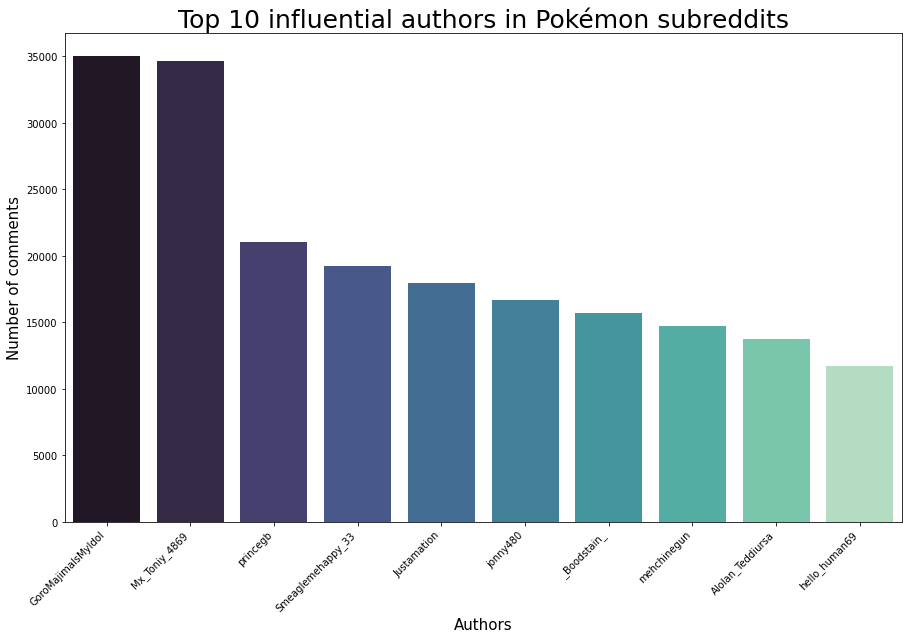

In [0]:
# Figure.3
# Plot top 10 influential authors in Pokémon subreddits
plt.figure(figsize=(15,9))
plot_1 = sns.barplot(x="author", y="num_comments_author", data=top_authors, palette=sns.color_palette("mako", n_colors = 10))
plot_1.set_title("Top 10 influential authors in Pokémon subreddits", fontsize=25)
plot_1.set_xlabel("Authors", fontsize=15)
plot_1.set_ylabel("Number of comments", fontsize=15)
plot_1.set_xticklabels(plot_1.get_xticklabels(), rotation = 45, horizontalalignment='right')

plot_fpath = os.path.join("data/plots", "top_authors.png")

plt.savefig(plot_fpath)
plt.show()

The graph above shows top 10 authors that receive largest number of comments in top 3 Pokémon subreddits. However, from the perspective of the number of comments, it's hard to conclude if these authors are high-quality content creators and have high commercial values. Some authors may publish controversial contents and receive a lot of comments. To determine if they are high-quality content creators, we implement further analysis by identifying their active subreddits and their top 10 popular submissions. 

The table below shows the subreddits where the top 5 authors post their submissions. GoroMajimaIsMyIdol and princegb are active in pokemontrades subreddit. Other three authors, Mx_Toniy_4869, Smeaglemehappy_33 and Justamation are active on pokemon subreddits. We want to further investigate what kind of submissions these authors posted, so we find out the top 10 submissions by each author in the following.

In [0]:
# number of comments for top 5 authors in subreddits
top5_authors = pokemon_submissions.filter(f.col("subreddit").isin(["pokemongo","pokemon","pokemontrades"]))
top5_authors = top5_authors.filter(f.col("author").isin(["GoroMajimaIsMyIdol", "Mx_Toniy_4869", "princegb", "Smeaglemehappy_33", "Justamation"])) \
                           .groupBy("author", "subreddit") \
                           .agg(f.sum(f.col("num_comments")).alias("num_comments")) \
                           .sort(f.col("author").desc())
top5_authors.show()

+------------------+-------------+------------+
|            author|    subreddit|num_comments|
+------------------+-------------+------------+
|          princegb|pokemontrades|       21049|
| Smeaglemehappy_33|      pokemon|       19231|
|     Mx_Toniy_4869|      pokemon|       34691|
|       Justamation|      pokemon|       17969|
|       Justamation|    pokemongo|           3|
|GoroMajimaIsMyIdol|pokemontrades|       35027|
+------------------+-------------+------------+



GoroMajimaIsMyIdol is active in PokemonTrades and Pokémon GTS (global trading system). The author's most popular submission "[100 Female RNG'd Shinies for International Women's Day! ♀️](https://www.reddit.com/r/pokemontrades/comments/t9juri/100_female_rngd_shinies_for_international_womens/) is to celebrate International Women days by randomly choosing 100 commenters to give away a shiny female Pokémon. The author has held a lot of events to give away Pokémon for free and help other people to complete their Pokémon collections.

In [0]:
# top 10 submissions posted by GoroMajimaIsMyIdol 
pokemon_submissions.filter((f.col("subreddit") == "pokemontrades") & (f.col("author") == "GoroMajimaIsMyIdol")) \
                   .select("subreddit", "author", "title", "num_comments", "score") \
                   .sort(f.col("num_comments").desc()) \
                   .limit(10).show(truncate=False)

+-------------+------------------+------------------------------------------------------------------------------------------------------------------------+------------+-----+
|subreddit    |author            |title                                                                                                                   |num_comments|score|
+-------------+------------------+------------------------------------------------------------------------------------------------------------------------+------------+-----+
|pokemontrades|GoroMajimaIsMyIdol|100 Female RNG'd Shinies for International Women's Day! ♀️                                                              |1065        |87   |
|pokemontrades|GoroMajimaIsMyIdol|FT: Complete Gen 7 Aprimon Collection, Alolan Variants LF: Items (Gen 7/8) (Happy to trade via Gen 7/Bank Transfer/Home)|545         |36   |
|pokemontrades|GoroMajimaIsMyIdol|🦋 Vivillon Home GTS Giveaway Day 18 - Heavy Tundra 🦋                                       

The author princegb also gives away a lot of Pokémon with hidden ability. The author holds more than one hundred giveaways, sending thousands of Pokémon to other players. This author is a very active user in Pokémon GTS and is enthusiastic to help other players.

In [0]:
# top 10 submissions posted by princegb
pokemon_submissions.filter((f.col("subreddit") == "pokemontrades") & (f.col("author") == "princegb")) \
                   .select("subreddit", "author", "title", "num_comments", "score") \
                   .sort(f.col("num_comments").desc()) \
                   .limit(10).show(truncate=False)

+-------------+--------+-----------------------------------------+------------+-----+
|subreddit    |author  |title                                    |num_comments|score|
+-------------+--------+-----------------------------------------+------------+-----+
|pokemontrades|princegb|Alola Hay                                |237         |37   |
|pokemontrades|princegb|I’m all Ears                             |234         |32   |
|pokemontrades|princegb|Come Adopt to Your Heart’s Content-acool!|216         |35   |
|pokemontrades|princegb|Baltoy Story                             |214         |29   |
|pokemontrades|princegb|So Far-fetch’d, So Good!                 |212         |35   |
|pokemontrades|princegb|Tyrogue One: A Pokemon Story             |212         |48   |
|pokemontrades|princegb|Adopt my [Hoenn] Aprimon                 |202         |11   |
|pokemontrades|princegb|Swabu the Decks                          |192         |29   |
|pokemontrades|princegb|Love at First Scythe          

Mx_Toniy_4869 posts obscure but fun Pokémon fact and receives a lot of comments. At the time this analysis is written, the author has already published more than 300 obscure facts. He shows very deep and comprehensive understanding of Pokémon history and Pokémon knowledge. We think cooperating with this author may be beneficial for The Pokémon Company. One idea is to release some unknown information to the author to arise people's attention in certain Pokémon topic. The Pokémon Company can consider this as an advertisement tool in social media. 

The following is an example of an obscure Pokémon fact. The image is from reddit: [Obscure Pokémon Fact Day 245](https://www.reddit.com/r/pokemon/comments/r5jzcp/obscure_pok%C3%A9mon_fact_day_245/)

<img src="https://i.redd.it/vdldj0xhhp281.png" width="750" height="750"/>

In [0]:
# top 10 submissions posted by Mx_Toniy_4869
pokemon_submissions.filter((f.col("subreddit") == "pokemon") & (f.col("author") == "Mx_Toniy_4869")) \
                   .select("subreddit", "author", "title", "num_comments", "score") \
                   .sort(f.col("num_comments").desc()) \
                   .limit(10).show(truncate=False)

+---------+-------------+-----------------------------------------+------------+-----+
|subreddit|author       |title                                    |num_comments|score|
+---------+-------------+-----------------------------------------+------------+-----+
|pokemon  |Mx_Toniy_4869|Obscure Pokémon Fact Day 208             |1965        |20992|
|pokemon  |Mx_Toniy_4869|Obscure Pokémon Fact Day 245             |1132        |8048 |
|pokemon  |Mx_Toniy_4869|Obscure Pokémon Fact Day 252             |991         |45348|
|pokemon  |Mx_Toniy_4869|Obscure Pokémon Fact Day 74              |592         |18240|
|pokemon  |Mx_Toniy_4869|Obscure Pokémon Fact Day 85              |552         |20358|
|pokemon  |Mx_Toniy_4869|Obscure Pokémon Fact Day 36: Max Damage  |463         |20670|
|pokemon  |Mx_Toniy_4869|Obscure Pokémon Fact Day 229             |453         |17205|
|pokemon  |Mx_Toniy_4869|Obscure Pokémon Fact Day 176             |434         |13753|
|pokemon  |Mx_Toniy_4869|Obscure Pokémon Fa

The author Smeaglemehappy_33 published two submissions that receive a large amount of comments: [Your One True Partner Pokemon (Based On Your Username)](https://www.reddit.com/r/pokemon/comments/x00f4f/your_one_true_partner_pokemon_based_on_your/) and [Give me a Pokemon and I’ll tell you how they would be useful in the real world](https://www.reddit.com/r/pokemon/comments/wu4u0t/give_me_a_pokemon_and_ill_tell_you_how_they_would/). However, the author's other submissions don't receive much attention compared to the top 2. We think this author luckily created two very popular submissions. The Pokémon company can investigate these posts to study what topics arise people's attention, but we don’t think it's necessary to cooperate with this author.

In [0]:
# top 10 submissions posted by Smeaglemehappy_33
pokemon_submissions.filter((f.col("subreddit") == "pokemon") & (f.col("author") == "Smeaglemehappy_33")) \
                   .select("subreddit", "author", "title", "num_comments", "score") \
                   .sort(f.col("num_comments").desc()) \
                   .limit(10).show(truncate=False)

+---------+-----------------+------------------------------------------------------------------------------+------------+-----+
|subreddit|author           |title                                                                         |num_comments|score|
+---------+-----------------+------------------------------------------------------------------------------+------------+-----+
|pokemon  |Smeaglemehappy_33|Your One True Partner Pokemon (Based On Your Username)                        |16671       |6842 |
|pokemon  |Smeaglemehappy_33|Give me a Pokemon and I’ll tell you how they would be useful in the real world|2280        |3077 |
|pokemon  |Smeaglemehappy_33|Your most challenging in game battle?                                         |193         |98   |
|pokemon  |Smeaglemehappy_33|Least favorite Pokemon from each generation                                   |61          |26   |
|pokemon  |Smeaglemehappy_33|What is the best team for a play through of Black/White?                   

The submission receiving highest comments of Justamation is [Found something similar to this yesterday, so i want to try do it also](https://www.reddit.com/r/pokemon/comments/qvqev1/found_something_similar_to_this_yesterday_so_i/). However, this submission is removed by moderators. We don't know the specific reason of removal, but this submission is considered as a violation to Pokémon community. Therefore, the author cannot be considered as high-quality content creators and do not have high commercial value. We do not recommend The Pokémon Company to cooperate with this author.

In [0]:
# top 10 submissions posted by Justamation
pokemon_submissions.filter((f.col("subreddit") == "pokemon") & (f.col("author") == "Justamation")) \
                   .select("subreddit", "author", "title", "num_comments", "score") \
                   .sort(f.col("num_comments").desc()) \
                   .limit(10).show(truncate=False)

+---------+-----------+---------------------------------------------------------------------------+------------+-----+
|subreddit|author     |title                                                                      |num_comments|score|
+---------+-----------+---------------------------------------------------------------------------+------------+-----+
|pokemon  |Justamation|Found something similar to this yesterday, so i want to try do it also     |17213       |12106|
|pokemon  |Justamation|Which gen 1 starter pokemon do you think you could beat in a fight         |745         |3907 |
|pokemon  |Justamation|I draw a Red Panda Pokemon, I'm not sure what should be it's evolution name|11          |5    |
|pokemon  |Justamation|Which gen 1 starter pokemon do you think you can win in a fight            |0           |1    |
+---------+-----------+---------------------------------------------------------------------------+------------+-----+



## 4.	How are the popularities of the recent 4 Pokémon games change from January 2021 to August 2022?

  Business goal: Determine popularities of recent 4 Pokémon games including Pokémon Sword & Shield (2019-11-15), Pokémon Brilliant Diamond & Shining Pearl (2021-11-19), Pokémon Legends: Arceus (2022-1-28) and Pokémon Scarlet & Violet (2022-11-18).

  Technical proposal: Perform research about these 4 games and decide keywords for these games. Use regex to filter comments related to these games by keywords. Create three dummy variables for each game to indicate if a submission or comment mentions each game. Sum 4 dummy variables over day to create time series data. Plot time series graphs for 4 dummy variables to show the trend of popularities.

In [0]:
# read from DBFS
pokemon_submissions = spark.read.parquet("/FileStore/pokemon_submissions")

In [0]:
# create dummy variables for 4 games
game_sub = pokemon_submissions.select(f.col('created_utc'),f.col('title'))
game_sub = game_sub.withColumn("swsh", f.when(f.col("title").rlike("(?i)sword|(?i)shield|(?i)galar|(?i)dynamax(?i)gigantamax"),1).otherwise(0)) \
                   .withColumn("bdsp", f.when(f.col("title").rlike("(?i)diamond|(?i)pearl|(?i)sinnoh|(?i)dialga(?i)palkia(?i)giratina"),1).otherwise(0)) \
                   .withColumn("arcu", f.when(f.col("title").rlike("(?i)arceus|(?i)hisui|(?i)sinnoh|(?i)dialga(?i)palkia(?i)giratina"),1).otherwise(0)) \
                   .withColumn("sv", f.when(f.col("title").rlike("(?i)scarlet|(?i)violet|(?i)paldea|(?i)koraidon(?i)miraidon"),1).otherwise(0))  
game_sub.show()

+-----------+--------------------+----+----+----+---+
|created_utc|               title|swsh|bdsp|arcu| sv|
+-----------+--------------------+----+----+----+---+
| 1612312761|Adventure is ever...|   0|   0|   0|  0|
| 1612312765|Adventure is ever...|   0|   0|   0|  0|
| 1612312769|Adventure is ever...|   0|   0|   0|  0|
| 1612312773|Finally found som...|   0|   0|   0|  0|
| 1612312773|Adventure is ever...|   0|   0|   0|  0|
| 1612312775|Adventure is ever...|   0|   0|   0|  0|
| 1612312779|Groudon &amp; Kyo...|   0|   0|   0|  0|
| 1612312783|Adventure is ever...|   0|   0|   0|  0|
| 1612312789|Adventure is ever...|   0|   0|   0|  0|
| 1612312791|Adventure is ever...|   0|   0|   0|  0|
| 1612312797|Adventure is ever...|   0|   0|   0|  0|
| 1612312799|Adventure is ever...|   0|   0|   0|  0|
| 1612312805|Adventure is ever...|   0|   0|   0|  0|
| 1612312806|Adventure is ever...|   0|   0|   0|  0|
| 1612312813|Adventure is ever...|   0|   0|   0|  0|
| 1612312813|Adventure is ev

In [0]:
# transfer UNIX timestamp to human readable date
game_sub = game_sub.withColumn("date", f.from_unixtime(f.col("created_utc"), "yyyy-MM-dd")).drop(f.col('created_utc'))

In [0]:
# count number of submissions for each game over time
game_sub_num = game_sub.groupBy("date").agg(f.sum("swsh").alias("PokemonSwordAndShield"), f.sum("bdsp").alias("PokemonBDSP"),                                           f.sum("arcu").alias("PokemonLegendsArceus"),f.sum("sv").alias("PokemonScarletViolet")).sort(f.col("date")).toPandas()
game_sub_num

,date,PokemonSwordAndShield,PokemonBDSP,PokemonLegendsArceus,PokemonScarletViolet
0,2021-01-01,113,9,8,0
1,2021-01-02,103,6,5,0
2,2021-01-03,116,8,8,0
3,2021-01-04,95,9,15,0
4,2021-01-05,103,8,7,0
...,...,...,...,...,...
603,2022-08-27,81,11,15,19
604,2022-08-28,70,10,32,19
605,2022-08-29,95,20,38,23
606,2022-08-30,77,19,23,19


In [0]:
game_sub_num.to_csv("data/csv/game_submission_num.csv", index=False)

In [0]:
# Figure.4
# Plot number of submissions for 4 Pokémon games from January 2021 to August 2022
fig = px.line(game_sub_num, x="date", y=game_sub_num.columns,
              hover_data={"date": "|%B %d, %Y"},
              title="Number of submissions for 4 Pokémon games from January 2021 to August 2022")
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y",
    ticklabelmode="period")
fig.write_html("data/plots/game_timeseires.html")
fig.show()

Pokémon Sword and Shield has the highest average discussion and popularity among the four games. As the earliest released of the four games, this game has completed player accumulation. The overall user stickiness is high, and the game has good social attributes. Players are willing to discuss it on the reddit.

Pokémon Brilliant Diamond and Shining Pearl (BDSP) is also widely discussed in the 2021 Pokémon day. The second discussion peak occurred in the middle of November, when the game was officially launched on the switch and brought about continuous high participation activities. In celebration of the release of these games on Nintendo Switch, Pokémon originally discovered in the Sinnoh region will be appearing more often in Pokémon GO. Turtwig, Chimchar, and Piplup wearing special Sinnoh-inspired hats will be appearing in the wild, and avatar items inspired by those same first partner Pokémon will be available in the shop.

Pokémon Legends: Arceus is also widely discussed in the 2021 Pokémon day. The second discussion peak occurred on January 28th, The official release date for Pokémon Legends: Arceus on Nintendo Switch 

Pokémon Scarlet and Violet will be officially released on November 18, 2022. The first time players know about this game is on February 27, 2022. The following high discussion volume also came from the release of new news on June 1 and August 3. players will be able to “explore an open world where various towns with no borders blend seamlessly into the wilderness.” Creatures will appear in the skies, in the sea, and on the streets.

Further step: We may refine the discussion keywords or sentiment analysis of each game to determine whether players are satisfied with the newly released game

## 5.	What is the most popular Pokémon discussed in subreddits?

  Business goal: Determine the Pokémon that receives the greatest number of discussions.

  Technical proposal: At the end of August 2022, there are 905 different Pokémons in Pokémon database. We regard Pokémons at the same evolution chain and different evolutions with the same origin as one Pokémon. Create a list of 15 Pokémon names which are potential candidates of the most popular Pokémon. Create dummy variables for each selected Pokémon using regex. Also, create dummy variables for all categories of Legendary Pokémon. Perform summation over dummy variables and sort result in descending order. Present result in a summary table.

In [0]:
pokemon_comments = spark.read.parquet("/FileStore/pokemon_comments")

In [0]:
# select top 5 subreddits
top5_subreddit = ["pokemongo",'pokemon','pokemontrades','PokemonTCG','PokemonSwordAndShield']
top_pokemon = pokemon_comments.filter(f.col("subreddit").isin(top5_subreddit)).select("subreddit", "body", "created_utc", "score")

In [0]:
# create dummy variables for Pokémon by searching Pokémon names
top_pokemon = top_pokemon.withColumn("Venusaur", f.col("body").rlike("(?i)bulbasaur|(?i)ivysaur|(?i)venusaur").cast("int")) \
                         .withColumn("Charizard", f.col("body").rlike("(?i)charmander|(?i)charmeleon|(?i)charizard").cast("int")) \
                         .withColumn("Blastoise", f.col("body").rlike("(?i)squirtle|(?i)wartortle|(?i)blastoise").cast("int")) \
                         .withColumn("Pikachu", f.col("body").rlike("(?i)pichu|(?i)pikachu|(?i)raichu").cast("int")) \
                         .withColumn("Eevee", f.col("body").rlike("(?i)Vaporeon|(?i)Jolteon|(?i)Flareon|(?i)Espeon|(?i)Umbreon|(?i)Leafeon|(?i)Glaceon|(?i)Sylveon").cast("int")) \
                         .withColumn("Dragonite", f.col("body").rlike("(?i)Dratini|(?i)Dragonair|(?i)Dragonite").cast("int")) \
                         .withColumn("Gardevoir", f.col("body").rlike("(?i)Ralts|(?i)Kirlia|(?i)Gardevoir").cast("int")) \
                         .withColumn("Lucario", f.col("body").rlike("(?i)Riolu|(?i)Lucario").cast("int")) \
                         .withColumn("Greninja", f.col("body").rlike("(?i)Froakie|(?i)Frogadier|(?i)Greninja").cast("int")) \
                         .withColumn("Incineroar", f.col("body").rlike("(?i)Litten|(?i)Torracat|(?i)Incineroar").cast("int")) \
                         .withColumn("Grimmsnarl", f.col("body").rlike("(?i)Impidimp|(?i)Morgrem|(?i)Grimmsnarl").cast("int")) \
                         .withColumn("Rillaboom", f.col("body").rlike("(?i)Grookey|(?i)Thwackey|(?i)Rillaboom").cast("int")) \
                         .withColumn("Whimsicott", f.col("body").rlike("(?i)Cottonee|(?i)Whimsicott").cast("int")) \
                         .withColumn("Gastrodon", f.col("body").rlike("(?i)Litten|(?i)Gastrodon").cast("int")) \
                         .withColumn("Amoonguss", f.col("body").rlike("(?i)Foongus|(?i)Amoonguss").cast("int"))
top_pokemon.show(10)

+--------------------+--------------------+-----------+-----+--------+---------+---------+-------+-----+---------+---------+-------+--------+----------+----------+---------+----------+---------+---------+
|           subreddit|                body|created_utc|score|Venusaur|Charizard|Blastoise|Pikachu|Eevee|Dragonite|Gardevoir|Lucario|Greninja|Incineroar|Grimmsnarl|Rillaboom|Whimsicott|Gastrodon|Amoonguss|
+--------------------+--------------------+-----------+-----+--------+---------+---------+-------+-----+---------+---------+-------+--------+----------+----------+---------+----------+---------+---------+
|          PokemonTCG|taking the left s...| 1610125584|    1|       0|        0|        0|      0|    0|        0|        0|      0|       0|         0|         0|        0|         0|        0|        0|
|             pokemon|         Chonki Boi!| 1610125592|    1|       0|        0|        0|      0|    0|        0|        0|      0|       0|         0|         0|        0|       

In [0]:
# count number of occurrence for each Pokémon
top_pokemon_count = top_pokemon.agg(f.sum("Venusaur").alias("Venusaur"), f.sum("Charizard").alias("Charizard"), 
                                   f.sum("Blastoise").alias("Blastoise"), f.sum("Pikachu").alias("Pikachu"), f.sum("Eevee").alias("Eevee"), 
                                   f.sum("Dragonite").alias("Dragonite"), f.sum("Gardevoir").alias("Gardevoir"), f.sum("Lucario").alias("Lucario"), 
                                   f.sum("Greninja").alias("Greninja"), f.sum("Incineroar").alias("Incineroar"), 
                                   f.sum("Grimmsnarl").alias("Grimmsnarl"), f.sum("Rillaboom").alias("Rillaboom"), 
                                   f.sum("Whimsicott").alias("Whimsicott"), f.sum("Gastrodon").alias("Gastrodon"), 
                                   f.sum("Amoonguss").alias("Amoonguss")).toPandas()

top_pokemon_count = top_pokemon_count.T.reset_index()
top_pokemon_count.columns = ["Pokemon", "count"]
top_pokemon_count.sort_values(by="count", ascending=False, inplace=True)
top_pokemon_count

,Pokemon,count
1,Charizard,114979
3,Pikachu,100395
4,Eevee,96001
5,Dragonite,46607
2,Blastoise,44508
0,Venusaur,43556
7,Lucario,36621
6,Gardevoir,29149
8,Greninja,22751
9,Incineroar,21904


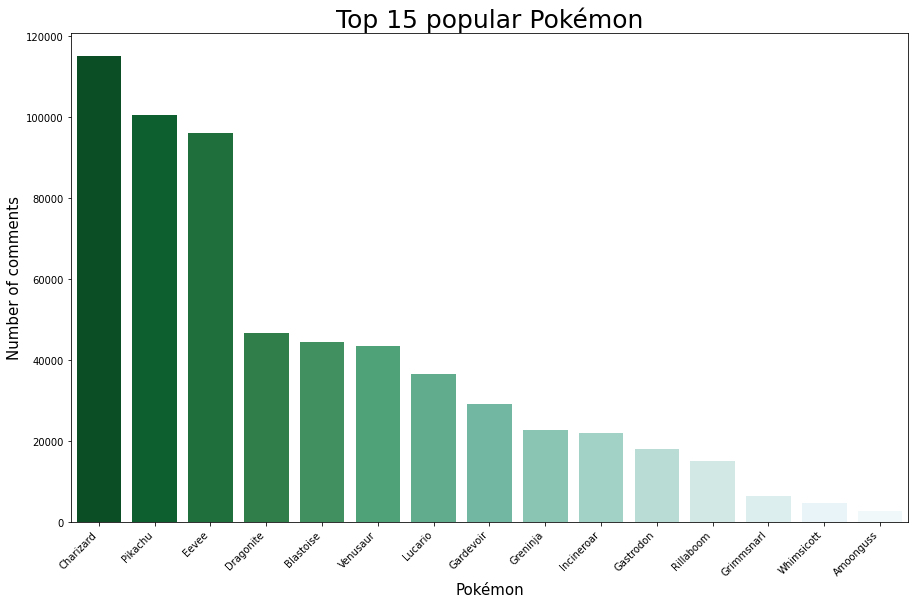

In [0]:
# Figure.5
# Plot top 15 popular Pokémon
plt.figure(figsize=(15,9))
plot_1 = sns.barplot(x="Pokemon", y="count", data=top_pokemon_count, palette=sns.color_palette("BuGn_r", n_colors = 15))
plot_1.set_title("Top 15 popular Pokémon", fontsize=25)
plot_1.set_xlabel("Pokémon", fontsize=15)
plot_1.set_ylabel("Number of comments", fontsize=15)
plot_1.set_xticklabels(plot_1.get_xticklabels(), rotation = 45, horizontalalignment='right')

plot_fpath = os.path.join("data/plots", "top15_pokemon.png")

plt.savefig(plot_fpath)
plt.show()

The graph above shows the top 15 popular Pokémon. Charizard is the Pokémon which receive the largest number of comments. Charizard is the ace Pokémon of protagonist named Ash in the first Pokémon anime series. Its cool appearance and strong performance in anime gave people very impressive memory. The popularity of Charizard last for decades and at current day, it's still the most popular Pokémon in social media. 

<img src="https://shidepu.georgetown.domains/ANLY502_project/charizard.png" width="500" height="500" class="center"/>

(Source: [Sonic Pokémon Uni-Pedia Wiki](https://sonic-pokemon-unipedia.fandom.com/wiki/Charizard))

The second and third popular Pokémon are Pikachu and Eevee. Pikachu is the most well-known Pokémon in the world and is the iconic face of Pokémon franchise. The success of Pikachu is the result of long-time investment by The Pokémon Company. In 1997, Pikachu was chosen as the partner of protagonist Ash. After 25 years and more than 1200 episodes, Pikachu become the most-seen Pokémon to fans and has strong emotional connection to Pokémon lovers. 

After the success of Pikachu, The Pokémon Company attempts to create another iconic face of Pokémon universe and their choice is Eevee. Eevee is the most special Pokémon which has 8 different types of evolutions. In 2018, The Pokémon Company released two Pokémon games: Pokémon: Let's Go, Pikachu! and Let's Go, Eevee! In these games, player start with Pikachu or Eevee and they always sit on player character's  shoulder in the overworld. This game further increased the popularity of Eevee. Due to specialty of Eevee, we will conduct further analysis about it.

<img src="https://shidepu.georgetown.domains/ANLY502_project/let's_go.jpg" width="500" height="500" class="center"/>

(Source: [Pokémon Let'Go](https://pokemonletsgo.pokemon.com/en-us/))

In [0]:
# extract year and month from UNIX timestamp
top_pokemon = top_pokemon.withColumn("year", f.from_unixtime(f.col("created_utc"), "yyyy"))
top_pokemon = top_pokemon.withColumn("month", f.from_unixtime(f.col("created_utc"), "yyyy-MM"))

In [0]:
# count number of comments of each Pokémon in subreddits over years
count_by_year = top_pokemon.groupby("subreddit", "year").agg(f.sum("Venusaur").alias("Venusaur"), f.sum("Charizard").alias("Charizard"), 
                                   f.sum("Blastoise").alias("Blastoise"), f.sum("Pikachu").alias("Pikachu"), f.sum("Eevee").alias("Eevee"), 
                                   f.sum("Dragonite").alias("Dragonite"), f.sum("Gardevoir").alias("Gardevoir"), f.sum("Lucario").alias("Lucario"), 
                                   f.sum("Greninja").alias("Greninja"), f.sum("Incineroar").alias("Incineroar"), 
                                   f.sum("Grimmsnarl").alias("Grimmsnarl"), f.sum("Rillaboom").alias("Rillaboom"), 
                                   f.sum("Whimsicott").alias("Whimsicott"), f.sum("Gastrodon").alias("Gastrodon"), 
                                   f.sum("Amoonguss").alias("Amoonguss")).orderBy("subreddit", "year").toPandas()
count_by_year

,subreddit,year,Venusaur,Charizard,Blastoise,Pikachu,Eevee,Dragonite,Gardevoir,Lucario,Greninja,Incineroar,Grimmsnarl,Rillaboom,Whimsicott,Gastrodon,Amoonguss
0,PokemonSwordAndShield,2021,2507,6809,2635,5153,6903,2917,2422,3435,1077,2509,1353,2840,582,2299,254
1,PokemonSwordAndShield,2022,2354,4253,1943,2595,2631,1380,1282,1277,1321,2315,1037,1954,323,1986,105
2,PokemonTCG,2021,3854,24934,5696,15591,14301,2948,1064,616,943,130,138,716,42,74,17
3,PokemonTCG,2022,2810,16000,4990,7549,11628,2532,632,843,1081,74,54,164,174,45,16
4,pokemon,2021,12508,26427,11492,30054,23550,9942,8116,12452,9370,6634,1335,4319,998,4983,487
5,pokemon,2022,9375,19603,8103,22197,18384,8498,6567,8134,6738,6022,944,2869,810,3875,286
6,pokemongo,2021,1876,4268,2132,5824,9204,5730,1340,2318,639,49,11,9,176,49,180
7,pokemongo,2022,1966,4130,1587,4404,6289,2464,1118,1379,322,295,2,8,153,233,164
8,pokemontrades,2021,4233,5781,4038,4090,1230,6617,4191,3924,894,2967,1104,1999,1009,3181,793
9,pokemontrades,2022,2073,2774,1892,2938,1881,3579,2417,2243,366,909,564,333,362,1309,416


The table above shows number of comments received by each Pokémon in different subreddits in 2021 and 2022. Charizard receives significantly high number of comments in PokémonTCG (Pokémon Trading Card Game). PokémonTCG has a similar mechanism to stock market. When people are enthusiastic about a Pokémon, they will trade that Pokémon card frequently leading increase of the card price. The card below is a Charizard card released in 1998. According to the sale records of PSA, the auction price of this card can be as high as about $300,000 ([Auction Prices Realized TCG Cards 1999 POKEMON GAME Charizard-Holo 1st Edition Summary](https://www.psacard.com/auctionprices/tcg-cards/1999-pokemon-game/charizard-holo/summary/544028)). 

<img src="https://shidepu.georgetown.domains/ANLY502_project/charizard_tcg.png" width="250" height="250" class="center"/>

(Source: [Pokémon Let'Go](https://pokemonletsgo.pokemon.com/en-us/))

In [0]:
# count number of comments of Pokémon over months
count_by_month = top_pokemon.groupby("month").agg(f.sum("Venusaur").alias("Venusaur"), f.sum("Charizard").alias("Charizard"), 
                                   f.sum("Blastoise").alias("Blastoise"), f.sum("Pikachu").alias("Pikachu"), f.sum("Eevee").alias("Eevee"), 
                                   f.sum("Dragonite").alias("Dragonite"), f.sum("Gardevoir").alias("Gardevoir"), f.sum("Lucario").alias("Lucario"), 
                                   f.sum("Greninja").alias("Greninja"), f.sum("Incineroar").alias("Incineroar"), 
                                   f.sum("Grimmsnarl").alias("Grimmsnarl"), f.sum("Rillaboom").alias("Rillaboom"), 
                                   f.sum("Whimsicott").alias("Whimsicott"), f.sum("Gastrodon").alias("Gastrodon"), 
                                   f.sum("Amoonguss").alias("Amoonguss")).orderBy("month").toPandas()
count_by_month

,month,Venusaur,Charizard,Blastoise,Pikachu,Eevee,Dragonite,Gardevoir,Lucario,Greninja,Incineroar,Grimmsnarl,Rillaboom,Whimsicott,Gastrodon,Amoonguss
0,2021-01,1809,5710,1818,5012,2607,1734,1033,1427,746,816,348,1015,237,688,218
1,2021-02,1723,5382,1783,5997,2663,1644,1006,1508,777,753,285,834,182,712,128
2,2021-03,1978,5074,1866,4482,2662,1930,1138,1672,1106,844,307,912,271,873,159
3,2021-04,1784,4309,1543,3652,3690,1813,1119,1749,1081,738,397,750,294,672,155
4,2021-05,1400,3584,1282,3167,3329,2193,935,1076,655,662,353,585,229,435,113
5,2021-06,1622,3989,1661,3498,2922,1368,958,1313,835,640,297,598,188,468,124
6,2021-07,2208,5174,2135,4947,3903,2109,1337,1627,974,801,274,559,223,641,149
7,2021-08,1807,5204,1995,5042,6606,2124,1279,1836,1286,1145,370,845,238,874,147
8,2021-09,2009,5304,1983,5710,6528,2332,1589,2226,1613,1216,329,1240,243,862,154
9,2021-10,2722,7236,3190,6756,7519,2137,1194,1846,1462,2298,333,954,262,2047,176


The table above shows the number of comments received by each Pokémon in months. Incineroar, Grimmsnarl, Rillaboom, Whimsicott, Gastrodon, Amoonguss are powerful Pokémon which have high use rate in Pokémon battle. On August 1, 2021, the Pokémon VGC (Video Game Championships) Series 10 began and Incineroar had the highest use rate of 69% based on the record of [Pikalytics](https://www.pikalytics.com/pokedex/series10). This can explain the sudden increase of popularity of Incineroar shown in the graph.

In addition of normal Pokémon shown above, we want to further investigate popularity of Legendary Pokémon. According to [Pokémon Wiki](https://pokemon.fandom.com/wiki/Legendary_Pok%C3%A9mon), "Legendary Pokémon (伝説でんせつのポケモン, Pokémon of Legends), or Pokémon Illusions (幻まぼろしのポケモン, Phantom Pokémon) are extremely rare and often very powerful Pokémon that are often associated with legends of creation and/or destruction within their endemic regions". Legendary Pokémon is closely related to storyline in every Pokémon game and should receive a lot of attention in Reddit.

In [0]:
# create dummy variables for Legendary Pokémon
top_pokemon_legend = top_pokemon.withColumn("Mew", f.col("body").rlike("(?i)\bMew\b|(?i)Mewtwo").cast("int")) \
                                .withColumn("Legendary_Birds", f.col("body").rlike("(?i)Articuno|(?i)Zapdos|(?i)Moltres").cast("int")) \
                                .withColumn("Legendary_Beasts", f.col("body").rlike("(?i)Raikou|(?i)Entei|(?i)Suicune|(?i)Lugia|(?i)Ho-oh").cast("int")) \
                                .withColumn("Tower_Duo", f.col("body").rlike("(?i)Lugia|(?i)Ho-oh").cast("int")) \
                                .withColumn("Legendary_Titans", f.col("body").rlike("(?i)Regirock|(?i)Regice|(?i)Registeel|(?i)Regigigas|(?i)Regieleki|(?i)Regidrago").cast("int")) \
                                .withColumn("Eon_Duo", f.col("body").rlike("(?i)Latias|(?i)Latios").cast("int")) \
                                .withColumn("Weather_Trio", f.col("body").rlike("(?i)Kyogre|(?i)Groudon|(?i)Rayquaza").cast("int")) \
                                .withColumn("Lake_Guardians", f.col("body").rlike("(?i)Uxie|(?i)Mesprit|(?i)Azelf").cast("int")) \
                                .withColumn("Creation_Trio", f.col("body").rlike("(?i)Dialga|(?i)Palkia|(?i)Giratina").cast("int")) \
                                .withColumn("Lunar_Duo", f.col("body").rlike("(?i)Cresselia|(?i)Darkrai").cast("int")) \
                                .withColumn("Heatran", f.col("body").rlike("(?i)Heatran").cast("int")) \
                                .withColumn("Swords_of_Justice", f.col("body").rlike("(?i)Cobalion|(?i)Terrakion|(?i)Virizion|(?i)Keldeo").cast("int")) \
                                .withColumn("Forces_of_Nature", f.col("body").rlike("(?i)Tornadus|(?i)Thundurus|(?i)Landorus|(?i)Enamorus").cast("int")) \
                                .withColumn("Tao_Trio", f.col("body").rlike("(?i)Reshiram|(?i)Zekrom|(?i)Kyurem").cast("int")) \
                                .withColumn("Aura_Trio", f.col("body").rlike("(?i)Xerneas|(?i)Yveltal|(?i)Zygarde").cast("int")) \
                                .withColumn("Guardian_Deities", f.col("body").rlike("(?i)Tapu").cast("int")) \
                                .withColumn("Sun_and_Moon_Line", f.col("body").rlike("(?i)Solgaleo|(?i)Lunala|(?i)Cosmog|(?i)Cosmoem").cast("int")) \
                                .withColumn("Necrozma", f.col("body").rlike("(?i)Necrozma").cast("int")) \
                                .withColumn("Hero_Duo", f.col("body").rlike("(?i)Zacian|(?i)Zamazenta").cast("int")) \
                                .withColumn("Eternatus", f.col("body").rlike("(?i)Eternatus").cast("int")) \
                                .withColumn("Kubfu_and_Urshifu", f.col("body").rlike("(?i)Kubfu|(?i)Urshifu").cast("int")) \
                                .withColumn("Calyrex_Trusty_Steeds", f.col("body").rlike("(?i)Glastrier|(?i)Spectrier|(?i)Calyrex").cast("int"))

top_pokemon_legend.show()

+--------------------+--------------------+-----------+-----+----+-------+---+---------------+----------------+---------+----------------+-------+------------+--------------+-------------+---------+-------+-----------------+----------------+--------+---------+----------------+-----------------+--------+--------+---------+-----------------+---------------------+
|           subreddit|                body|created_utc|score|year|  month|Mew|Legendary_Birds|Legendary_Beasts|Tower_Duo|Legendary_Titans|Eon_Duo|Weather_Trio|Lake_Guardians|Creation_Trio|Lunar_Duo|Heatran|Swords_of_Justice|Forces_of_Nature|Tao_Trio|Aura_Trio|Guardian_Deities|Sun_and_Moon_Line|Necrozma|Hero_Duo|Eternatus|Kubfu_and_Urshifu|Calyrex_Trusty_Steeds|
+--------------------+--------------------+-----------+-----+----+-------+---+---------------+----------------+---------+----------------+-------+------------+--------------+-------------+---------+-------+-----------------+----------------+--------+---------+------------

In [0]:
# count number of occurrence for Legendary Pokémon
legend_pokemon_count = top_pokemon_legend.agg(f.sum("Mew").alias("Mew"), f.sum("Legendary_Birds").alias("Legendary_Birds"), 
                                   f.sum("Legendary_Beasts").alias("Legendary_Beasts"), f.sum("Tower_Duo").alias("Tower_Duo"), 
                                   f.sum("Legendary_Titans").alias("Legendary_Titans"), f.sum("Eon_Duo").alias("Eon_Duo"), 
                                   f.sum("Weather_Trio").alias("Weather_Trio"), f.sum("Lake_Guardians").alias("Lake_Guardians"), 
                                   f.sum("Creation_Trio").alias("Creation_Trio"), f.sum("Lunar_Duo").alias("Lunar_Duo"), 
                                   f.sum("Heatran").alias("Heatran"), f.sum("Swords_of_Justice").alias("Swords_of_Justice"), 
                                   f.sum("Forces_of_Nature").alias("Forces_of_Nature"), f.sum("Tao_Trio").alias("Tao_Trio"), 
                                   f.sum("Aura_Trio").alias("Aura_Trio"), f.sum("Guardian_Deities").alias("Guardian_Deities"), 
                                   f.sum("Sun_and_Moon_Line").alias("Sun_and_Moon_Line"), f.sum("Necrozma").alias("Necrozma"),
                                   f.sum("Hero_Duo").alias("Hero_Duo"), f.sum("Eternatus").alias("Eternatus"),
                                   f.sum("Kubfu_and_Urshifu").alias("Kubfu_and_Urshifu"), 
                                   f.sum("Calyrex_Trusty_Steeds").alias("Calyrex_Trusty_Steeds")).toPandas()

legend_pokemon_count = legend_pokemon_count.T.reset_index()
legend_pokemon_count.columns = ["Legend_Pokemon", "count"]
legend_pokemon_count.sort_values(by="count", ascending=False, inplace=True)
legend_pokemon_count

,Legend_Pokemon,count
6,Weather_Trio,47722
2,Legendary_Beasts,47294
8,Creation_Trio,45100
18,Hero_Duo,43439
0,Mew,37897
1,Legendary_Birds,30507
3,Tower_Duo,30293
4,Legendary_Titans,19410
13,Tao_Trio,19024
14,Aura_Trio,17508


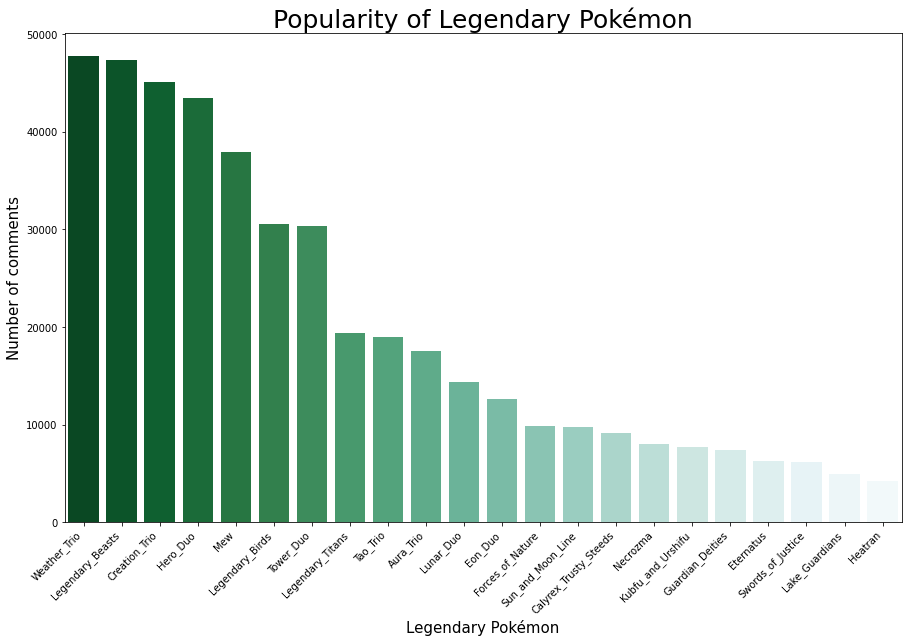

In [0]:
# Figure.6
# Plot popularity of Legendary Pokémon
plt.figure(figsize=(15,9))
plot_1 = sns.barplot(x="Legend_Pokemon", y="count", data=legend_pokemon_count, palette=sns.color_palette("BuGn_r", n_colors = 22))
plot_1.set_title("Popularity of Legendary Pokémon", fontsize=25)
plot_1.set_xlabel("Legendary Pokémon", fontsize=15)
plot_1.set_ylabel("Number of comments", fontsize=15)
plot_1.set_xticklabels(plot_1.get_xticklabels(), rotation = 45, horizontalalignment='right')

plot_fpath = os.path.join("data/plots", "top15_legendary_pokemon.png")

plt.savefig(plot_fpath)
plt.show()

The graph above shows the number of comments received by each category of Legendary Pokémon. The Weather Trio receive highest number of comments. The Weather Trio includes Kyogre, Groudon and Rayquaza which were first introduced in Pokémon Sapphire, Ruby, and Emerald in 2004. In the storyline of these games, the battle between Kyogre and Groudon causes huge disaster to the Pokémon world and Rayquaza mediates the battle. This was the first time Pokémon players saw battle between Legendary Pokémon which left very impressive memory to them. About 20 years later, Weather Trio still has the highest popularity among all Legendary Pokémon.

<img src="https://shidepu.georgetown.domains/ANLY502_project/weather_trio.jpg" width="350" height="350" class="center"/>

(Source: [Pinterest](https://www.pinterest.com/pin/300544975116019116/))

In [0]:
# count number of occurrence of Legendary Pokémon in subreddits
legend_by_subreddit = top_pokemon_legend.groupBy("subreddit").agg(f.sum("Mew").alias("Mew"), f.sum("Legendary_Birds").alias("Legendary_Birds"), 
                                   f.sum("Legendary_Beasts").alias("Legendary_Beasts"), f.sum("Tower_Duo").alias("Tower_Duo"), 
                                   f.sum("Legendary_Titans").alias("Legendary_Titans"), f.sum("Eon_Duo").alias("Eon_Duo"), 
                                   f.sum("Weather_Trio").alias("Weather_Trio"), f.sum("Lake_Guardians").alias("Lake_Guardians"), 
                                   f.sum("Creation_Trio").alias("Creation_Trio"), f.sum("Lunar_Duo").alias("Lunar_Duo"), 
                                   f.sum("Heatran").alias("Heatran"), f.sum("Swords_of_Justice").alias("Swords_of_Justice"), 
                                   f.sum("Forces_of_Nature").alias("Forces_of_Nature"), f.sum("Tao_Trio").alias("Tao_Trio"), 
                                   f.sum("Aura_Trio").alias("Aura_Trio"), f.sum("Guardian_Deities").alias("Guardian_Deities"), 
                                   f.sum("Sun_and_Moon_Line").alias("Sun_and_Moon_Line"), f.sum("Necrozma").alias("Necrozma"),
                                   f.sum("Hero_Duo").alias("Hero_Duo"), f.sum("Eternatus").alias("Eternatus"),
                                   f.sum("Kubfu_and_Urshifu").alias("Kubfu_and_Urshifu"), 
                                   f.sum("Calyrex_Trusty_Steeds").alias("Calyrex_Trusty_Steeds")).toPandas()

pd.options.display.max_columns = None
legend_by_subreddit

,subreddit,Mew,Legendary_Birds,Legendary_Beasts,Tower_Duo,Legendary_Titans,Eon_Duo,Weather_Trio,Lake_Guardians,Creation_Trio,Lunar_Duo,Heatran,Swords_of_Justice,Forces_of_Nature,Tao_Trio,Aura_Trio,Guardian_Deities,Sun_and_Moon_Line,Necrozma,Hero_Duo,Eternatus,Kubfu_and_Urshifu,Calyrex_Trusty_Steeds
0,pokemon,12640,8454,18440,10838,6888,4312,19051,1756,22824,7421,2169,2285,2874,8606,7411,2420,3943,5599,5256,3711,2018,2322
1,PokemonSwordAndShield,3129,5374,6157,3313,6466,2300,8721,811,4905,1710,554,2028,1802,3305,5985,2395,3714,1806,23631,1288,2154,3022
2,pokemongo,13216,7266,8828,6830,2242,3662,7275,1053,6640,2086,739,776,3656,2617,1259,729,203,76,846,50,23,21
3,pokemontrades,1201,3063,6303,4604,3410,1365,2588,1311,7890,1895,577,854,1140,943,1880,927,1359,379,10616,314,670,2339
4,PokemonTCG,7711,6350,7566,4708,404,976,10087,52,2841,1255,213,184,410,3553,973,896,500,205,3090,904,2822,1389


The table above shows number of occurrences in comments data of Legendary Pokémon in top 5 subreddits. Most Legendary Pokémon are unique in games, so players usually don't trade them. This is the reason to explain why the number of occurrences in pokemontrades is lower than other subreddits. Popular Legendary Pokémon such as Mew, Legendary Birds, Legendary Beasts and Weather Trio has high number of occurrences in all subreddits except pokemontrades. This can show people's enthusiasm to these Legendary Pokémon. Creation Trio is very powerful in games and control power of space and time in storyline, so they always receive a lot of attention. Hero Duo is originally introduced in Pokémon Sword and Shield, so it has a large number of discussions in the corresponding subreddit.

## 6.	Eevee is one of the most special Pokémon which has the greatest number of different evolutions. What is the most popular Eevee evolution in different subreddits?

  Business goal: Determine the Eevee evolution that receives the greatest number of discussions in different Pokémon subreddits.

  Technical proposal: Use regex to search all comments contain Eevee evolutions. Create dummy variables for each Eevee evolution (8 different evolutions). Conduct counts of number of occurrences of each dummy variable in different subreddits. Present the result with a summary table.

In [0]:
# read from DBFS
Eevee_comments = spark.read.parquet("/FileStore/pokemon_comments")

In [0]:
# select top 5 subreddits
top5_subreddit = ["pokemongo",'pokemon','pokemontrades','PokemonTCG','PokemonSwordAndShield']
Eevee_com = Eevee_comments.filter(f.col("subreddit").isin(top5_subreddit)).select(f.col('subreddit'),f.col('body'))

In [0]:
# create dummy variables for each evolution
Eevee_com = Eevee_com.withColumn("Vaporeon",f.when(f.col("body").rlike("(?i)vaporeon"), 1).otherwise(0))
Eevee_com = Eevee_com.withColumn("Jolteon",f.when(f.col("body").rlike("(?i)jolteon|(?i)sparky"), 1).otherwise(0))
Eevee_com = Eevee_com.withColumn("Flareon",f.when(f.col("body").rlike("(?i)flareon|(?i)pyro"), 1).otherwise(0))
Eevee_com = Eevee_com.withColumn("Umbreon",f.when(f.col("body").rlike("(?i)umbreon|(?i)tamao"), 1).otherwise(0))
Eevee_com = Eevee_com.withColumn("Glaceon",f.when(f.col("body").rlike("(?i)glaceon"), 1).otherwise(0))
Eevee_com = Eevee_com.withColumn("Espeon",f.when(f.col("body").rlike("(?i)espeon|(?i)sakura"), 1).otherwise(0))
Eevee_com = Eevee_com.withColumn("Leafeon",f.when(f.col("body").rlike("(?i)leafeon|(?i)linnea"), 1).otherwise(0))
Eevee_com = Eevee_com.withColumn("Sylveon",f.when(f.col("body").rlike("(?i)sylveon|(?i)kira"), 1).otherwise(0))

In [0]:
# count number of comments of each evolution
Eevee_com_num = Eevee_com.agg(f.sum("Vaporeon").alias("Vaporeon"), f.sum("Jolteon").alias("Jolteon"),
                              f.sum("Flareon").alias("Flareon"), f.sum("Umbreon").alias("Umbreon"),
                              f.sum("Glaceon").alias("Glaceon"), f.sum("Espeon").alias("Espeon"),
                              f.sum("Leafeon").alias("Leafeon"), f.sum("Sylveon").alias("Sylveon")).toPandas()
Eevee_com_num = Eevee_com_num.T.reset_index()
Eevee_com_num.columns = ['evolutionary_forms','num_comment']
Eevee_com_num = Eevee_com_num.sort_values(by='num_comment', ascending=False)
Eevee_com_num

,evolutionary_forms,num_comment
3,Umbreon,31553
7,Sylveon,20743
5,Espeon,16981
0,Vaporeon,15384
2,Flareon,11655
1,Jolteon,11509
4,Glaceon,9615
6,Leafeon,9073


In [0]:
# compute proportion for plot
Eevee_com_num['proportion'] = round(Eevee_com_num['num_comment']/sum(Eevee_com_num['num_comment'])*100,3)
Eevee_com_num

,evolutionary_forms,num_comment,proportion
3,Umbreon,31553,24.941
7,Sylveon,20743,16.396
5,Espeon,16981,13.422
0,Vaporeon,15384,12.160
2,Flareon,11655,9.212
1,Jolteon,11509,9.097
4,Glaceon,9615,7.600
6,Leafeon,9073,7.172


In [0]:
Eevee_com_num.to_csv("data/csv/Eevee_evolution_comment_num.csv", index=False)

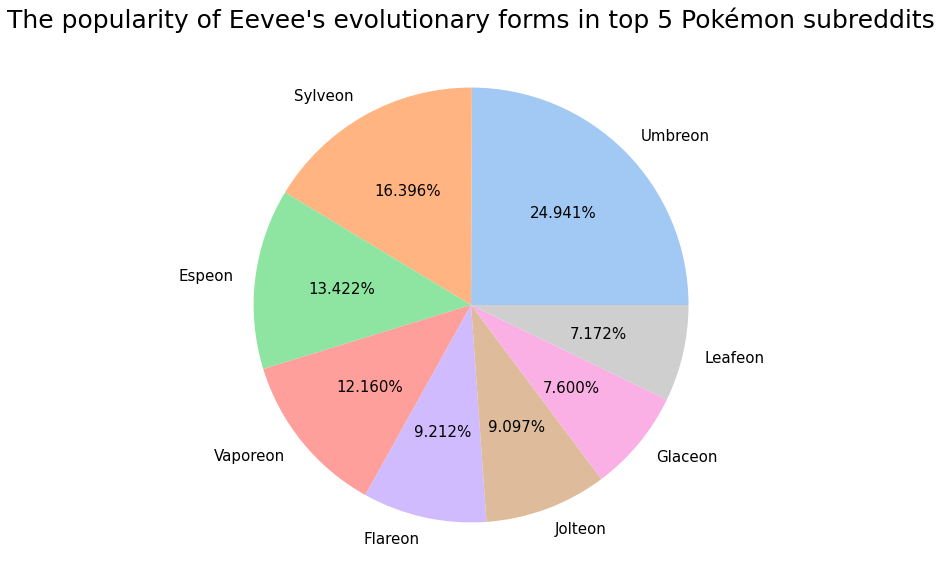

In [0]:
# Figure.7
# Plot the popularity of Eevee's evolutionary forms in top 5 Pokémon subreddits
plt.figure(figsize=(10,10))
plt.pie(Eevee_com_num['proportion'], labels = Eevee_com_num['evolutionary_forms'], colors = sns.color_palette('pastel'), autopct='%.3f%%',textprops={'fontsize': 15})
plt.title("The popularity of Eevee's evolutionary forms in top 5 Pokémon subreddits", fontsize=25)

plot_fpath = os.path.join("data/plots", "Eevee_evolutionary_pie.png")
plt.savefig(plot_fpath)
plt.show()
# if change color later 
# colors = {'Umbreon': '#',   }
# colors = [colors[key] for key in Eevee_com_num['evolutionary_forms']]

Result：The three most discussed Eevee evolutionary forms are the Umbreon, Sylveon, and Espeon. Each Eevee evolution form has different evolution condition which brings a lot of interesting experience to game players. Most Eevee evolutions don't have strong abilities and good battle performance. Thus, we think the appearance is the main reason to explain why certain Eevee evolution form is more popular than other. We will analyze why Umbreon and Sylveon have such high amount of discussion in the subsequent research and explain why they are considered as the successful evolution forms by players.

In [0]:
# count number of occurrences in subreddits
Eevee_num_subreddit = Eevee_com.groupBy('subreddit').agg(f.sum("Vaporeon").alias("Vaporeon"), f.sum("Jolteon").alias("Jolteon"),
                              f.sum("Flareon").alias("Flareon"), f.sum("Umbreon").alias("Umbreon"),
                              f.sum("Glaceon").alias("Glaceon"), f.sum("Espeon").alias("Espeon"),
                              f.sum("Leafeon").alias("Leafeon"), f.sum("Sylveon").alias("Sylveon"))
Eevee_num_subreddit.show()

+--------------------+--------+-------+-------+-------+-------+------+-------+-------+
|           subreddit|Vaporeon|Jolteon|Flareon|Umbreon|Glaceon|Espeon|Leafeon|Sylveon|
+--------------------+--------+-------+-------+-------+-------+------+-------+-------+
|             pokemon|    8116|   5784|   6072|  10985|   4726|  7719|   4469|   7729|
|PokemonSwordAndSh...|    1617|   1060|   1055|   3067|    802|  1508|    821|   2408|
|           pokemongo|    2764|   1923|   1946|   5746|   1817|  2713|   1250|   5301|
|       pokemontrades|     339|    338|    402|    989|    380|  1139|    377|    693|
|          PokemonTCG|    2548|   2404|   2180|  10766|   1890|  3902|   2156|   4612|
+--------------------+--------+-------+-------+-------+-------+------+-------+-------+



Umbreon has significantly higher popularity in PokemonTCG compared to other evolutions. People like Umbreon because of its delicate design and cat-like appearance. As we discussed in section of Charizard, when people are enthusiastic about a Pokémon, they will trade that Pokémon card frequently leading to increase of the card price. Pokémon fans' enthusiasm of Umbreon is reflected in card market. Also, the beautiful artwork of the card attracts a lot of players. As the result, the Umbreon VMAX as shown below is the most expensive card published in past three years during Pokémon Sword and Shield generation. The current market price of the card is between $500 to $600. Based on the market performance and popularity in Reddit, we consider Umbreon as the most successful Eevee evolution form.

<img src="https://shidepu.georgetown.domains/ANLY502_project/Umbreon_VMAX.png" width="250" height="250" class="center"/>

(Source: [TCGplayer](https://www.tcgplayer.com/product/246723/pokemon-swsh07-evolving-skies-umbreon-vmax-alternate-art-secret?xid=pia3a78bd7-9422-4939-ae11-7ecabdac5d08&page=1&Language=English))

Sylveon is the evolution form which receives the second highest amount of attention. Sylveon attracts Pokémon players because of cute appearance. Some people even think Sylveon is the cutest Pokémon ever. Thus, the Sylveon VMAX card also has high trading volumes. The current market price of this card is about $150.  

<img src="https://shidepu.georgetown.domains/ANLY502_project/Sylveon_VMAX.png" width="250" height="250" class="center"/>

(Source: [TCGplayer](https://www.tcgplayer.com/product/246704/pokemon-swsh07-evolving-skies-sylveon-vmax-alternate-art-secret?xid=pi952d295e-3a63-403b-8b4b-3cd7ca833b0f&Language=English))

## 9.	Can we use number of posts in Pokémon subreddits to predict the stock price of Nintendo?

  Business goal: Perform time series analysis and build a time series model to predict Nintendo stock price using number of posts in Pokémon subreddits.

  Technical proposal: Gather Nintendo stock data from January 2021 to August 2022 from Yahoo Finance. Full outer Join the stock data with the time series data created in Question 2. Fill missing values in joint data with linear interpolation. Train a VAR (vector autoregression) model to predict stock price. Present result by a graph showing actual vs. predicted data.

In [0]:
df_stocks = pd.read_csv('/dbfs/FileStore/NTDOY.csv')
df_stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,15.960,16.000000,15.656,15.740000,15.740000,3369000
1,2021-01-05,15.908,16.176001,15.908,16.176001,16.176001,1448500
2,2021-01-06,15.872,15.872000,15.628,15.738000,15.738000,1900000
3,2021-01-07,15.806,15.842000,15.600,15.802000,15.802000,2363000
4,2021-01-08,15.910,16.090000,15.804,16.010000,16.010000,2465000


In [0]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Figure.8
# Plot Nintendo stock prices from Janurary 2021 to August 2022
candlesticks = go.Candlestick(x=df_stocks["Date"], open=df_stocks["Open"], high=df_stocks["High"], 
                              low=df_stocks["Low"], close=df_stocks["Close"], showlegend=False)

volume_bars = go.Bar(x=df_stocks["Date"], y=df_stocks["Volume"], showlegend=False, marker={"color": "rgba(128,128,128,0.5)",})

fig = go.Figure(candlesticks)
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(candlesticks, secondary_y=True)
fig.add_trace(volume_bars, secondary_y=False)
fig.update_layout(title="Nintendo Stock Prices from Janurary 2021 to August 2022", height=800)
fig.update_yaxes(title="Nintendo Stock Price", secondary_y=True, showgrid=True)
fig.update_yaxes(title="Volume", secondary_y=False, showgrid=False)
fig.write_html("data/plots/NTDOY.html")
fig.show()

The graph shows the stock price of Nintendo from Jan 2021 to Aug 2022. The price displays a decreasing trend in the recent year with occasional oscillations and dropped from 15.74 to 10.22. There does not exist much seasonality since the stock price would be largely affected by the overall trend of economic recession in the recent post-pandemic period and several unique corporate events.

On Feb 17, 2021, Nintendo hosted the longest Nintendo Direct presentation in recent years to share news on available games as well as upcoming games. That included Pokémon Snap which would come to Nintendo Switch. This droves the stock price up to a relatively high point. The same logic holds for the surge in June 2021 when Nintendo was preparing for its E3 Nintendo Direct on June 15th, 2021.

The steep decreasing trend from Jul 2021 to Dec 2021 is mainly due to decreasing demand in both hardware and software markets, which also caused a decrease in net sales. Also, main investor pulling back could be another possible reason for the decrease.

The stock gradually recovered from Dec 2021 to Mar 2022 with a series of releasing events happening during the last quarter of fiscal 2022. That also included several updates on the Pokémon series, such as Pokémon Legends: Arceus. 

Further step: 1. Full outer join the stock price data with the time series data attained from Question 2. 2. Filling in missing values with linear interpolation. 3. Build time series models to see whether we can predict Nintendo stock price with the number of posts in Pokémon subreddits.

In [0]:
pokemon_submissions = spark.read.parquet("/FileStore/pokemon_submissions")
pokemon_submissions = pokemon_submissions.withColumn("date", f.from_unixtime(f.col("created_utc"), "yyyy-MM-dd"))
df_timeseries = pd.read_csv("data/csv/top3_subreddit_timeseires.csv")

# select top 3 reddits and those related to Nintendo games
# group by date and subreddit
# sum number of comments
# "pokemon","pokemontrades","pokemongo",
subreddits = ["PokemonTCG","PokemonSwordAndShield","PokemonUnite","PokemonMasters","PokemonLegendsArceus","PokemonBDSP"]
pokemon_submissions_date = pokemon_submissions.filter(f.col("subreddit").isin(subreddits)) \
                                              .groupBy("date", "subreddit") \
                                              .agg(f.sum(f.col("num_comments")).alias("num_comments_date")) \
                                              .sort(f.col("date").desc()) \
                                              .toPandas()

list_tcg = pokemon_submissions_date[pokemon_submissions_date.subreddit == "PokemonTCG"].num_comments_date.tolist()
list_swsd = pokemon_submissions_date[pokemon_submissions_date.subreddit == "PokemonSwordAndShield"].num_comments_date.tolist()
list_master = pokemon_submissions_date[pokemon_submissions_date.subreddit == "PokemonMasters"].num_comments_date.tolist()
df_timeseries = df_timeseries.assign(PokemonTCG=list_tcg, PokemonSwordAndShield=list_swsd,  PokemonMasters=list_master)
# thses subreddits have less than 608 days, thus use join
uniteDF = pokemon_submissions_date[pokemon_submissions_date.subreddit == "PokemonUnite"][['date','num_comments_date']].rename(columns={'num_comments_date':'PokemonUnite'})
arcuDF = pokemon_submissions_date[pokemon_submissions_date.subreddit == "PokemonLegendsArceus"][['date','num_comments_date']].rename(columns={'num_comments_date':'PokemonLegendsArceus'})
BDSPDF = pokemon_submissions_date[pokemon_submissions_date.subreddit == "PokemonBDSP"][['date','num_comments_date']].rename(columns={'num_comments_date':'PokemonBDSP'})

df_timeseries = df_timeseries.merge(uniteDF, how='outer')
df_timeseries = df_timeseries.merge(arcuDF, how='outer')
df_timeseries = df_timeseries.merge(BDSPDF, how='outer')
df_timeseries

,date,pokemontrades,pokemon,pokemongo,PokemonTCG,PokemonSwordAndShield,PokemonMasters,PokemonUnite,PokemonLegendsArceus,PokemonBDSP
0,2022-08-31,1495,4404,4595,3038,2261,1468,2079.0,189.0,259.0
1,2022-08-30,1669,5024,3890,2734,2481,1810,1947.0,250.0,379.0
2,2022-08-29,2085,8077,5366,2426,2017,2930,2653.0,569.0,286.0
3,2022-08-28,2245,21951,4187,2489,2396,2382,1292.0,506.0,154.0
4,2022-08-27,1900,4686,5281,2426,2523,2009,1452.0,303.0,197.0
...,...,...,...,...,...,...,...,...,...,...
603,2021-01-05,3273,5354,1687,2682,2576,688,NaN,NaN,NaN
604,2021-01-04,3099,7190,2030,3079,3099,1326,NaN,NaN,NaN
605,2021-01-03,3474,2720,1802,2285,3515,643,NaN,NaN,NaN
606,2021-01-02,3662,3881,1682,2064,3306,544,NaN,NaN,NaN


In [0]:
# Merge reddit dataset and stock price dataset
df_stocks = df_stocks[['Date','Close','Volume']].rename(columns={'Date':'date'})
df_timeseries_stocks = df_timeseries.merge(df_stocks, how='outer')
# fill missing values by linear interpolation
df_timeseries_stocks = df_timeseries_stocks.interpolate(method='linear', limit_direction = 'forward')
# save data
df_timeseries_stocks.to_csv("data/csv/timeseries_subreddits_stocks.csv", index=False)
df_timeseries_stocks

,date,pokemontrades,pokemon,pokemongo,PokemonTCG,PokemonSwordAndShield,PokemonMasters,PokemonUnite,PokemonLegendsArceus,PokemonBDSP,Close,Volume
0,2022-08-31,1495,4404,4595,3038,2261,1468,2079.0,189.0,259.0,10.220000,6.080000e+05
1,2022-08-30,1669,5024,3890,2734,2481,1810,1947.0,250.0,379.0,10.286000,1.007000e+06
2,2022-08-29,2085,8077,5366,2426,2017,2930,2653.0,569.0,286.0,10.350000,1.350500e+06
3,2022-08-28,2245,21951,4187,2489,2396,2382,1292.0,506.0,154.0,10.380000,1.742833e+06
4,2022-08-27,1900,4686,5281,2426,2523,2009,1452.0,303.0,197.0,10.410000,2.135167e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
603,2021-01-05,3273,5354,1687,2682,2576,688,1.0,301.0,161.0,16.176001,1.448500e+06
604,2021-01-04,3099,7190,2030,3079,3099,1326,1.0,301.0,161.0,15.740000,3.369000e+06
605,2021-01-03,3474,2720,1802,2285,3515,643,1.0,301.0,161.0,15.740000,3.369000e+06
606,2021-01-02,3662,3881,1682,2064,3306,544,1.0,301.0,161.0,15.740000,3.369000e+06
